In [1]:
# using wave
import wave
import numpy as np

#this audio says "memohon maaf"
jnt = wave.open("../jnt-memohonmaaf.wav", "r")
jnt_soundwave = jnt.readframes(-1)

import librosa
audio_data1 = '../jnt-memohonmaaf.wav'
x , sampling_rate = librosa.load(audio_data1)
print(type(x), type(sampling_rate))
print(x.shape, sampling_rate)


# jnt-memohonmaaf_slowed
jnt_slow = wave.open("../jnt-memohonmaaf-slowed.wav", "r")
jnt_soundwave_slow = jnt_slow.readframes(-1)

audio_data1_slow = '../jnt-memohonmaaf-slowed.wav'
y , sampling_rate = librosa.load(audio_data1_slow)
print(type(y), type(sampling_rate))
print(y.shape, sampling_rate)


#jnt-memohonmaaf_fast
jnt_fast = wave.open("../jnt-memohonmaaf-1.5.wav", "r")
jnt_soundwave_fast = jnt_fast.readframes(-1)

audio_data1_fast = '../jnt-memohonmaaf-1.5.wav'
z , sampling_rate = librosa.load(audio_data1_fast)
print(type(z), type(sampling_rate))
print(z.shape, sampling_rate)



#citylink normal
citylink = wave.open("../citylink.wav", "r")
citylink_soundwave = citylink.readframes(-1)

audio_data2 = '../citylink.wav'
a , sampling_rate = librosa.load(audio_data2)
print(type(a), type(sampling_rate))
print(a.shape, sampling_rate)


#citylink slowed
citylink_slow = wave.open("../citylink-slowed.wav", "r")
citylink_soundwave_slow = citylink_slow.readframes(-1)

audio_data2_slow = '../citylink-slowed.wav'
b , sampling_rate = librosa.load(audio_data2_slow)
print(type(b), type(sampling_rate))
print(b.shape, sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
(50274,) 22050
<class 'numpy.ndarray'> <class 'int'>
(71357,) 22050
<class 'numpy.ndarray'> <class 'int'>
(33516,) 22050
<class 'numpy.ndarray'> <class 'int'>
(31232,) 22050
<class 'numpy.ndarray'> <class 'int'>
(45397,) 22050


In [2]:
# jnt-memohonmaaf_normal
import IPython.display as ipd
ipd.Audio(audio_data1)

In [3]:
# jnt-memohonmaaf_slowed
import IPython.display as ipd
ipd.Audio(audio_data1_slow)

In [4]:
# citylink
import IPython.display as ipd
ipd.Audio(audio_data2)

In [5]:
# citylink_slowed
import IPython.display as ipd
ipd.Audio(audio_data2_slow)

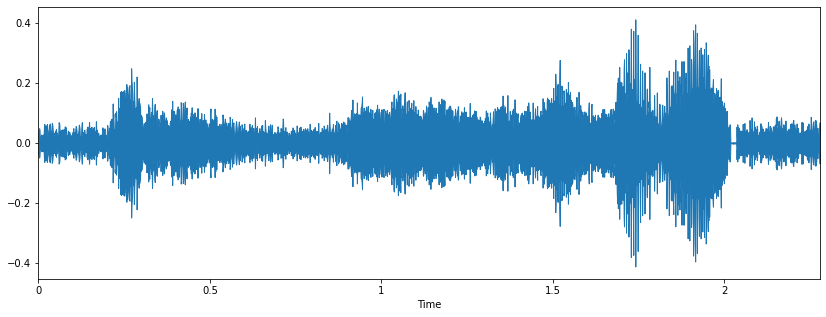

In [6]:
# jnt-memohonmaaf_normal
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sampling_rate)

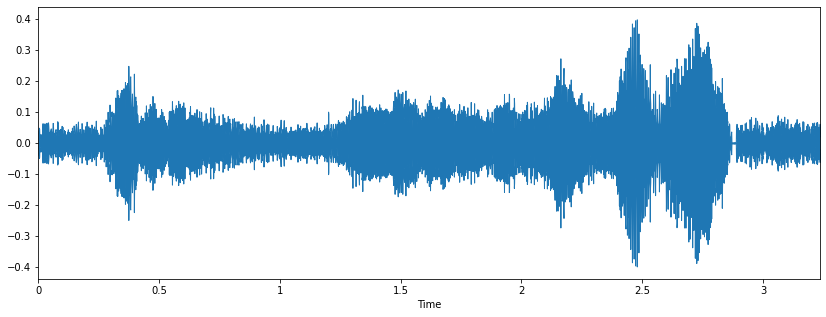

In [7]:
# jnt-memohonmaaf_slowed
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sampling_rate)

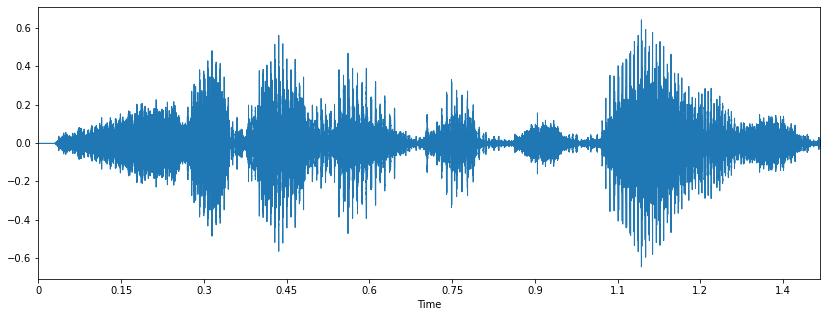

In [8]:
# citylink
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(a, sr=sampling_rate)

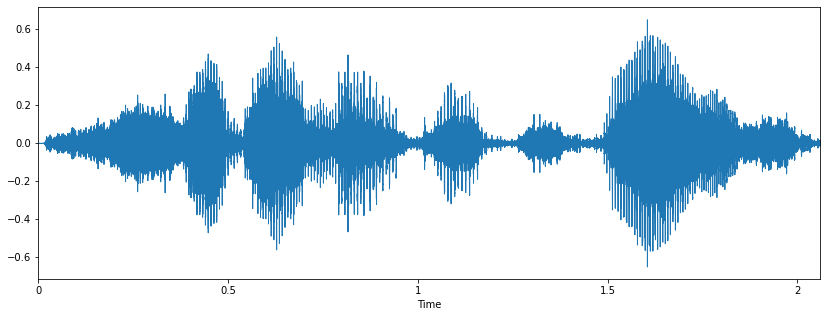

In [9]:
# citylink_slowed
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(b, sr=sampling_rate)

In [10]:
#using scipy
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

#jnt memohonmaaf
fs1, data1 = wavfile.read("../jnt-memohonmaaf.wav")
fs2, data1_slow = wavfile.read("../jnt-memohonmaaf-slowed.wav")
print("\njnt memohon maaf")
print(data1)
print(data1_slow)
jnt_maaf = np.amax(data1, axis=1)
jnt_maaf_slow = np.amax(data1_slow, axis=1)


#citylink
fs4, data3 = wavfile.read("../citylink.wav")
fs5, data3_slow = wavfile.read("../citylink-slowed.wav")
print("\n\ncitylink")
print(data3)
print(data3_slow)
citylink = np.amax(data3, axis=1)
citylink_slow = np.amax(data3_slow, axis=1)


jnt memohon maaf
[[  173   173]
 [  152   152]
 [  165   165]
 ...
 [-1508 -1508]
 [-1403 -1403]
 [-1293 -1293]]
[[  172   172]
 [  151   151]
 [  164   164]
 ...
 [-1508 -1508]
 [-1403 -1403]
 [-1293 -1293]]


citylink
[[   0    0]
 [   0    0]
 [   0    0]
 ...
 [-858 -277]
 [-855 -303]
 [-844 -331]]
[[  0   0]
 [  0   0]
 [  0   0]
 ...
 [382 525]
 [398 559]
 [379 554]]


In [11]:
# the dynamic time warping implementation
def dtw(normal, slow):
    normal_len = len(normal)
    slow_len = len(slow)
    dtw_matrix = np.zeros((normal_len+1,slow_len+1))
    
    for i in range(normal_len+1):
        for j in range(slow_len+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0,0] = 0
    
    for i in range(1, normal_len+1):
        for j in range(1, slow_len+1):
            cost = abs(normal[i-1] - slow[j-1])
            
            last_min = np.min([dtw_matrix[i-1,j], dtw_matrix[i,j-1],dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [12]:
# comparing same audio, with different speed (jnt memohon maaf)
print("\nmemohon maaf vs memohon maaf (slowed):")
print(dtw(jnt_soundwave[:10], jnt_soundwave_slow[:10]))


memohon maaf vs memohon maaf (slowed):
[[  0.  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf   1. 174. 175. 348. 370. 543. 565. 738. 747. 920.]
 [ inf 173.   1. 173. 173. 324. 324. 475. 475. 639. 639.]
 [ inf 174. 174.   2. 175. 195. 368. 346. 519. 484. 657.]
 [ inf 346. 174. 174.   2. 153. 153. 304. 304. 468. 468.]
 [ inf 366. 326. 194. 154.   3. 155. 154. 306. 316. 468.]
 [ inf 538. 326. 366. 154. 154.   3. 154. 154. 318. 316.]
 [ inf 558. 478. 346. 306. 155. 155.   4. 156. 166. 318.]
 [ inf 730. 478. 518. 306. 306. 155. 155.   4. 168. 166.]
 [ inf 737. 643. 485. 471. 320. 320. 169. 169.   5. 170.]
 [ inf 909. 643. 657. 471. 471. 320. 320. 169. 169.   5.]]


In [13]:
# comparing same audio, with different speed (citylink)
print("\n\ncitylink vs citylink (slowed):")
print(dtw(citylink_soundwave[:10], citylink_soundwave_slow[:10]))



citylink vs citylink (slowed):
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [14]:
# comparing different audio(jnt_maaf and citylink)
print("\n\nmemohon maaf vs jnt perak:")
print(dtw(jnt_soundwave[:10], citylink_soundwave[:10]))



memohon maaf vs jnt perak:
[[   0.   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf]
 [  inf  173.  346.  519.  692.  865. 1038. 1211. 1384. 1557. 1730.]
 [  inf  173.  173.  173.  173.  173.  173.  173.  173.  173.  173.]
 [  inf  346.  346.  346.  346.  346.  346.  346.  346.  346.  346.]
 [  inf  346.  346.  346.  346.  346.  346.  346.  346.  346.  346.]
 [  inf  498.  498.  498.  498.  498.  498.  498.  498.  498.  498.]
 [  inf  498.  498.  498.  498.  498.  498.  498.  498.  498.  498.]
 [  inf  650.  650.  650.  650.  650.  650.  650.  650.  650.  650.]
 [  inf  650.  650.  650.  650.  650.  650.  650.  650.  650.  650.]
 [  inf  815.  815.  815.  815.  815.  815.  815.  815.  815.  815.]
 [  inf  815.  815.  815.  815.  815.  815.  815.  815.  815.  815.]]


In [15]:
# using fastdtw library
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# --------------------------------------------------------------------

# comparing same audio, with different speed (jnt memohon maaf)
print("Fast DTW\nmemohon maaf vs memohon maaf (slowed):")
distance1, path1 = fastdtw(jnt_maaf, jnt_maaf_slow, dist=euclidean)

print("The distance between them is: "+ str(distance1) +"\n")
print("The matched path are:")
print(path1)

Fast DTW
memohon maaf vs memohon maaf (slowed):
The distance between them is: 135451317.0

The matched path are:
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 9

In [17]:
# comparing same audio, with different speed (citylink)
print("\nFast DTW\ncitylink vs jnt citylink (slowed):")
distance2, path2 = fastdtw(citylink, citylink_slow, dist=euclidean)

print("The distance between them is: "+ str(distance2) +"\n")
print("The matched path are:")
print(path2)


Fast DTW
citylink vs jnt citylink (slowed):
The distance between them is: 120304507.0

The matched path are:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99),

In [18]:
# comparing different audio(jnt_maaf and citylink)
print("\nFast DTW\nmemohon maaf vs citylink:")

# distance3, path3 = fastdtw(jnt_maaf, jnt_perak, dist=euclidean)
# distance3, path3 = fastdtw(jnt_maaf, jnt_perak_slow, dist=euclidean)
# distance3, path3 = fastdtw(jnt_signal_perak, jnt_signal_maaf, dist=euclidean)
distance3, path3 = fastdtw(jnt_maaf, citylink, dist=euclidean)

print("The distance between them is: "+ str(distance3) +"\n")
print("The matched path are:")
print(path3)


Fast DTW
memohon maaf vs citylink:
The distance between them is: 185953005.0

The matched path are:
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91)

In [ ]:
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------
# bawah ni mungkin tak guna, tapi saja simpan dulu

In [ ]:
#---------------------------------------------------------------
# jnt perak normal
jnt2 = wave.open("../jnt-perak.wav", "r")
jnt2_soundwave = jnt2.readframes(-1)

import librosa
audio_data2 = '../jnt-perak.wav'
a , sampling_rate = librosa.load(audio_data2)
print(type(a), type(sampling_rate))
print(a.shape, sampling_rate)


# jnt perak slow
jnt2_slow = wave.open("../jnt-perak-slowed.wav", "r")
jnt2_soundwave_slow = jnt2_slow.readframes(-1)

audio_data2_slow = '../jnt-perak-slowed.wav'
b , sampling_rate = librosa.load(audio_data2_slow)
print(type(b), type(sampling_rate))
print(b.shape, sampling_rate)


#in scipy
#jnt perak
fs3, data2 = wavfile.read("../jnt-perak.wav")
fs4, data2_slow = wavfile.read("../jnt-perak-slowed.wav")
print(data2)
print(data2_slow)
jnt_perak = np.amax(data2, axis=1)
jnt_perak_slow = np.amax(data2_slow, axis=1)


In [ ]:
# jnt perak normal
import IPython.display as ipd
ipd.Audio(audio_data2)

In [ ]:
# jnt perak slow
import IPython.display as ipd
ipd.Audio(audio_data2_slow)

In [ ]:
# jnt perak normal
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(a, sr=sampling_rate)

In [ ]:
# jnt perak slow
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(b, sr=sampling_rate)

In [ ]:
# convert the numpy array to list, to analyse with fastdtw
jnt_maaf = x.tolist()
jnt_maaf_slow = y.tolist()

jnt_perak = a.tolist()
jnt_perak_slow = b.tolist()
print("Successful converted")
# print(jnt_maaf)

In [ ]:
# convert hexadecimal from wave to int16

#maaf audio
jnt_signal_maaf = np.frombuffer(jnt_soundwave, dtype='int16', count=100)
jnt_signal_maaf_slow = np.frombuffer(jnt_soundwave_slow, dtype='int16')
jnt_signal_maaf_fast = np.frombuffer(jnt_soundwave_fast, dtype='int16')

print(jnt_signal_maaf)
print(jnt_signal_maaf_slow)
print(jnt_signal_maaf_fast)


#perak audio
jnt_signal_perak = np.frombuffer(jnt2_soundwave, dtype='int16', count=100)
jnt_signal_perak_slow = np.frombuffer(jnt2_soundwave_slow, dtype='int16')

print(jnt_signal_perak)
print(jnt_signal_perak_slow)

print("Successful converted")